In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster

1. This problem involves the K-means clustering algorithm.

(a) Prove `(10.12)`.

[q1](https://github.com/coxy1989/mlsabbatical/blob/master/notebooks/statistical_learning/ch10_statistical_learning/q1.jpg)

(b) On the basis of this identity, argue that the K-means clustering algorithm `(Algorithm 10.1)` decreases the objective `(10.11)` at each iteration.

- In `10.1` we reduce the RHS of the inequality `10.12` by reducing the distance of the points in the cluster from the cluster mean. `10.12` shows that this is equivalent to reducing the objective `10.11` - which is the LHS of `10.12`.

2. Suppose that we have four observations, for which we compute a dissimilarity matrix, given by: `(see ISL p413`). For instance, the dissimilarity between the first and second observations is `0.3`, and the dissimilarity between the second and fourth observations is `0.8`.

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

(b) Repeat (a), this time using single linkage clustering.

[q1 and b](https://github.com/coxy1989/mlsabbatical/blob/master/notebooks/statistical_learning/ch10_statistical_learning/q2.JPG)

(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

- The clusters `{1, 2}` and `{3,4}`

(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

- The clusters are `{1, 2, 3}` and `{4}`

(e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

- You can trivially see this by looking at the diagrams in [q1 and b](https://github.com/coxy1989/mlsabbatical/blob/master/notebooks/statistical_learning/ch10_statistical_learning/q2.JPG), in (a) you can switch 1 and 2 or you can switch 3 and 4. In (b) you can switch 1 and 2.

3. In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows:

In [67]:
df = pd.DataFrame({'x1' : [1,1,0,5,6,4], 'x2' : [4,3,4,1,2,0]})
df.index = df.index + 1
df

,x1,x2
1,1,4
2,1,3
3,0,4
4,5,1
5,6,2
6,4,0


(a) Plot the observations.

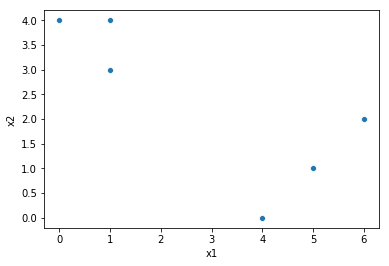

In [68]:
sns.scatterplot(x='x1', y='x2', data=df)

(b) Randomly assign a cluster label to each observation. Report the cluster labels for each observation.

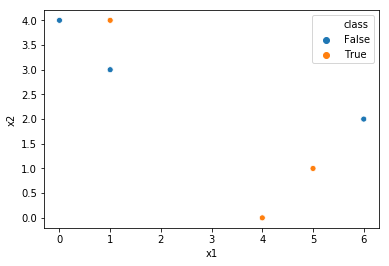

In [82]:
df['class'] = np.random.uniform(0,1,df.shape[0]) > 0.5
sns.scatterplot(x='x1', y='x2', hue='class', data=df)

(c) Compute the centroid for each cluster.

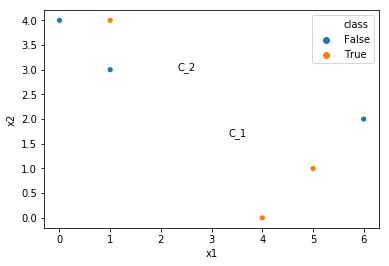

In [83]:
def compute_centroids(df):
    c_1 = df[df['class']].mean()[['x1', 'x2']]
    c_2 = df[df['class'] == False].mean()[['x1', 'x2']]
    return c_1, c_2

centroid_1, centroid_2 = compute_centroids(df)
ax = sns.scatterplot(x='x1', y='x2', hue='class', data=df)
_ = ax.text(centroid_1.x1, centroid_1.x2, 'C_1')
_ = ax.text(centroid_2.x1, centroid_2.x2, 'C_2')

(d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

Text(2.33333,3,'C_2')

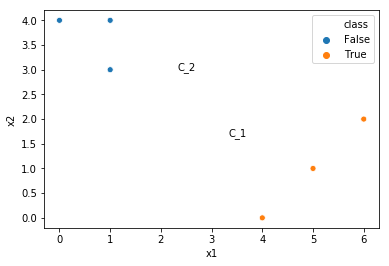

In [84]:
def compute_class(df, centroid_1, centroid_2):
    c1 = np.sqrt(((centroid_1.x1 - df.x1) ** 2) + ((centroid_1.x2 - df.x2) ** 2))
    c2 = np.sqrt(((centroid_2.x1 - df.x1) ** 2) + ((centroid_2.x2 - df.x2) ** 2))
    return c1 < c2


df['class'] = compute_class(df, centroid_1, centroid_2)
ax = sns.scatterplot(x='x1', y='x2', hue='class', data=df)
ax.text(centroid_1.x1, centroid_1.x2, 'C_1')
ax.text(centroid_2.x1, centroid_2.x2, 'C_2')

(e) Repeat (c) and (d) until the answers obtained stop changing.

Text(0.666667,3.66667,'C_2')

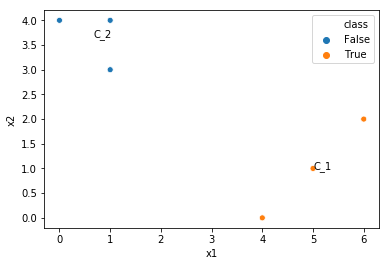

In [92]:
centroid_1, centroid_2 = compute_centroids(df)
df['class'] = compute_class(df, centroid_1, centroid_2)
ax = sns.scatterplot(x='x1', y='x2', hue='class', data=df)
ax.text(centroid_1.x1, centroid_1.x2, 'C_1')
ax.text(centroid_2.x1, centroid_2.x2, 'C_2')

4. Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.

(a) At a certain point on the single linkage dendrogram, the clusters `{1,2,3}` and `{4,5}` fuse. On the complete linkage dendrogram, the clusters `{1, 2, 3}` and `{4, 5}` also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

- In the special case that `1 = 2 = 3` and `4 = 5`, then fusion will occur at the same level for both single and complete linkage.
- If `1 = 2 = 3` is NOT true or `4 = 5` is NOT true, then fusion will occur at a higher level for complete linkage compared to single linkage.

(b) At a certain point on the single linkage dendrogram, the clusters `{5}` and `{6}` fuse. On the complete linkage dendrogram, the clusters `{5}` and `{6}` also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

- The same height, there is only one item in each cluster and therefore linkage is irrelevant.

5. In words, describe the results that you would expect if you performed K-means clustering of the eight shoppers in Figure `10.14`, on the basis of their sock and computer purchases, with `K = 2`. Give three answers, one for each of the variable scalings displayed. Explain.

- LHS: `s: 8,11,7,6,5,6,7,8` `c: 0,0,0,0,1,1,1,1` the outlier with `s = 11, c = 0` dominates, resulting in a cluster containing only that observation and another cluster with the rest.

- MID: `s: 1,1.3,0.9,0.75,0.6,0.75,0.8,1` `c: 0,0,0,0,1.2,1.2,1.2,1.2`: the clustering is dominated by the magnitude of the variance of `c` we should expect the two clusters corresponding to `c=1` and `c=0` with `s` ignored.

- RHS: `s: 0,0,0,0,0,0,0,0` `c: 0,0,0,0,1,1,1,1`: the clustering is along a line, there is no variance in the `s` dimension.

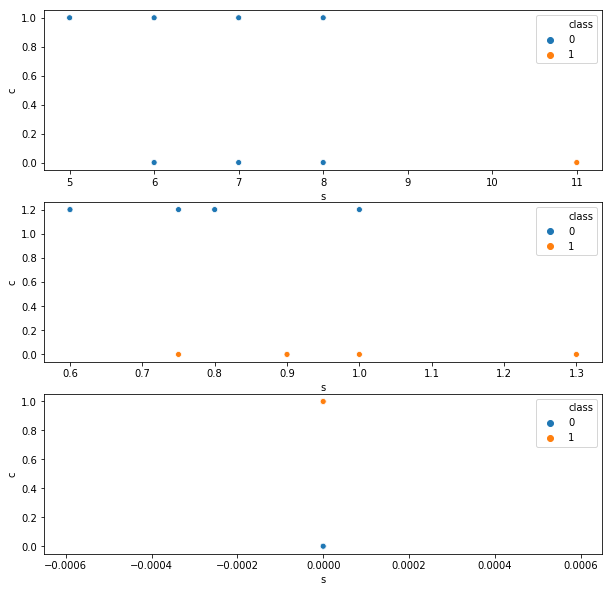

In [118]:
_, (ax1, ax2, ax3) = plt.subplots(figsize=(10,10), nrows=3)

lhs = pd.DataFrame({'s' : [8,11,7,6,5,6,7,8], 'c' : [0,0,0,0,1,1,1,1]})
lhs['class'] = cluster.KMeans(n_clusters=2).fit_predict(lhs)
sns.scatterplot(x='s', y='c', hue='class', data=lhs, ax=ax1)

lhs = pd.DataFrame({'s' : [1,1.3,0.9,0.75,0.6,0.75,0.8,1], 'c' : [0,0,0,0,1.2,1.2,1.2,1.2]})
lhs['class'] = cluster.KMeans(n_clusters=2).fit_predict(lhs)
sns.scatterplot(x='s', y='c', hue='class', data=lhs, ax=ax2)

lhs = pd.DataFrame({'s' : [0,0,0,0,0,0,0,0], 'c' : [0,0,0,0,1,1,1,1]})
lhs['class'] = cluster.KMeans(n_clusters=2).fit_predict(lhs)
sns.scatterplot(x='s', y='c', hue='class', data=lhs, ax=ax3)

6. A researcher collects expression measurements for `1,000` genes in `100` tissue samples. The data can be written as a `1000 × 100` matrix, which we call `X`, in which each row represents a gene and each column a tissue sample. Each tissue sample was processed on a different day, and the columns of X are ordered so that the samples that were processed earliest are on the left, and the samples that were processed later are on the right. The tissue samples belong to two groups: control (C) and treatment (T). The `C` and `T` samples were processed in a random order across the days. The researcher wishes to determine whether each gene’s expression measurements differ between the treatment and control groups. As a pre-analysis (before comparing `T` versus `C`), the researcher performs a principal component analysis of the data, and finds that the first principal component (a vector of length `100`) has a strong linear trend from left to right, and explains 10% of the variation. The researcher now remembers that each patient sample was run on one of two machines, A and B, and machine A was used more often in the earlier times while B was used more often later. The researcher has a record of which sample was run on which machine.


(a) Explain what it means that the first principal component “explains 10 % of the variation”.

- The ratio of (the variance of the data projected onto the first principal component) to (the total variance of the data) is 0.1


(b) The researcher decides to replace the `(j, i)th` element of `X` with `xji − φj1zi1`
where `zi1` is the `ith` score, and `φj1` is the `jth` loading, for the first principal component. He will then perform a two-sample t-test on each gene in this new data set in order to determine whether its expression differs between the two conditions. Critique this idea, and suggest a better approach. (The principal component analysis is performed on `X.T`).

(c) Design and run a small simulation experiment to demonstrate the superiority of your idea.

The indexes in this question don't make sense: 
- The data matrix `X` is of shape `1000 X 100`
- The `X[j][i]` element in `X` is replaced with `x[j][i] - phi[j][1] * z[i][1]`
- The shape of phi is `100 x 100`
- How can both `X` and `phi` be indexed in their first dimesion by `j`??

Moreover:
- We're told "the first principal component (a vector of length `100`)"
- We're told "the principal component analysis is performed on `X.T`"
- `X.T` is `100 x 1000` therefore the first principal component would be of length `1000`.

Seems to me this question is extremely unclear, I'll come back after discussion with study buddy.